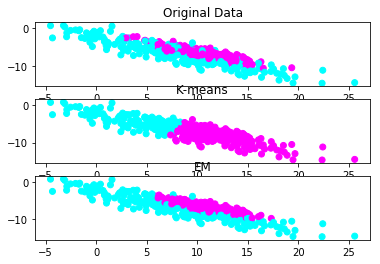

In [7]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture, cluster, datasets
%matplotlib inline

def _generating_data():
    random_state = 180
    X, y = datasets.make_blobs(n_samples=500, n_features = 2, 
                               centers=2, cluster_std=[3, 1.5], 
                               random_state=random_state)
    transformation = [[1.6, -0.6], [-0.8, 0.8]]
    X_aniso = np.dot(X, transformation)
    return X_aniso, y



x, y = _generating_data()
fig, axes = plt.subplots(3, 1)


axes[0].scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.cool)
axes[0].set_title('Original Data')

km = KMeans(2)
clusters_km = km.fit_predict(x)

axes[1].scatter(x[:,0], x[:,1], c=clusters_km, cmap=plt.cm.cool)
axes[1].set_title('K-means')




em = mixture.GaussianMixture(n_components=2, covariance_type='full')
em.fit(x)
clusters_em = em.predict(x)


axes[2].scatter(x[:,0], x[:,1], c=clusters_em, cmap=plt.cm.cool)
axes[2].set_title('EM')
plt.show()